 --- 
# UCI - Default from Credit Card Clients
---

# Dataset presentation

This dataset contains information on default payments, demographic factors, credit data, history of payment, and bill statements of credit card clients in Taiwan from April 2005 to September 2005.

It can be found here:
https://archive.ics.uci.edu/ml/datasets/default+of+credit+card+clients

## Variables
There are 25 variables:

* ID: ID of each client
* LIMIT_BAL: Amount of given credit in NT dollars (includes individual and family/supplementary credit
* SEX: Gender (1=male, 2=female)
* EDUCATION: (1=graduate school, 2=university, 3=high school, 4=others, 5=unknown, 6=unknown)
* MARRIAGE: Marital status (1=married, 2=single, 3=others)
* AGE: Age in years
* PAY_0: Repayment status in September, 2005 (-1=pay duly, 1=payment delay for one month, 2=payment delay for two months, ... 8=payment delay for eight months, 9=payment delay for nine months and above)
* PAY_2: Repayment status in August, 2005 (scale same as above)
* PAY_3: Repayment status in July, 2005 (scale same as above)
* PAY_4: Repayment status in June, 2005 (scale same as above)
* PAY_5: Repayment status in May, 2005 (scale same as above)
* PAY_6: Repayment status in April, 2005 (scale same as above)
* BILL_AMT1: Amount of bill statement in September, 2005 (NT dollar)
* BILL_AMT2: Amount of bill statement in August, 2005 (NT dollar)
* BILL_AMT3: Amount of bill statement in July, 2005 (NT dollar)
* BILL_AMT4: Amount of bill statement in June, 2005 (NT dollar)
* BILL_AMT5: Amount of bill statement in May, 2005 (NT dollar)
* BILL_AMT6: Amount of bill statement in April, 2005 (NT dollar)
* PAY_AMT1: Amount of previous payment in September, 2005 (NT dollar)
* PAY_AMT2: Amount of previous payment in August, 2005 (NT dollar)
* PAY_AMT3: Amount of previous payment in July, 2005 (NT dollar)
* PAY_AMT4: Amount of previous payment in June, 2005 (NT dollar)
* PAY_AMT5: Amount of previous payment in May, 2005 (NT dollar)
* PAY_AMT6: Amount of previous payment in April, 2005 (NT dollar)
* default.payment.next.month: Default payment (1=yes, 0=no)


In [4]:
%load_ext autoreload
%autoreload 2

# Useful imports

## Packages

In [242]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import sklearn
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

In [243]:
pd.set_option('display.max_columns', 120)

In [244]:
sns.set_style("darkgrid")

## Data Preparation imports

from sklearn.preprocessing import StandardScaler

## Model imports

In [245]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

In [246]:
import xgboost as xgb

In [302]:
import lightgbm as lgb

In [248]:
# import catboost

## Metrics imports

In [249]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score

# Importing our Data easily!

In [250]:
path = 'UCI_Credit_Card.csv'

In [251]:
from dataprep.load import load_raw_data
from dataprep.load import load_data
from dataprep.load import load_data_xy


df = load_data(path)
X_raw, y_raw = load_data_xy(path)

# Protocol for pipelined workflow

Puis on se doit de définir les dictionnaires / classes que l'on va utiliser pour stocker les modèles, leurs scores selon toutes les métriques

Ainsi, on pourra les capitalizeer facilement

## Pipeline bricks

Pipeline bricks are pipelines which only do a small elementary change (such as adding a feature, deleting a feature...)

### Age binning

In [49]:
X_raw.head()

,limit_bal,gender,education,marriage,age,pay_1,pay_2,pay_3,pay_4,pay_5,pay_6,bill_amt1,bill_amt2,bill_amt3,bill_amt4,bill_amt5,bill_amt6,pay_amt1,pay_amt2,pay_amt3,pay_amt4,pay_amt5,pay_amt6
0,20000.0,2,2,1,24,1,1,0,0,0,0,3913.0,3102.0,689.0,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0
1,120000.0,2,2,2,26,0,1,0,0,0,1,2682.0,1725.0,2682.0,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0
2,90000.0,2,2,2,34,0,0,0,0,0,0,29239.0,14027.0,13559.0,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0
3,50000.0,2,2,1,37,0,0,0,0,0,0,46990.0,48233.0,49291.0,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0
4,50000.0,1,2,1,57,0,0,0,0,0,0,8617.0,5670.0,35835.0,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0


In [50]:
from dataprep.feature_eng import bin_age

bin_age(X_raw).head()

,limit_bal,gender,education,marriage,pay_1,pay_2,pay_3,pay_4,pay_5,pay_6,bill_amt1,bill_amt2,bill_amt3,bill_amt4,bill_amt5,bill_amt6,pay_amt1,pay_amt2,pay_amt3,pay_amt4,pay_amt5,pay_amt6,age_bin
0,20000.0,2,2,1,1,1,0,0,0,0,3913.0,3102.0,689.0,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,20s
1,120000.0,2,2,2,0,1,0,0,0,1,2682.0,1725.0,2682.0,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,20s
2,90000.0,2,2,2,0,0,0,0,0,0,29239.0,14027.0,13559.0,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,30s
3,50000.0,2,2,1,0,0,0,0,0,0,46990.0,48233.0,49291.0,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,30s
4,50000.0,1,2,1,0,0,0,0,0,0,8617.0,5670.0,35835.0,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,50s


In [51]:
from dataprep.pipelines import AgeBinAdder

age_adder = AgeBinAdder()
age_adder.transform(X_raw).head()

,limit_bal,gender,education,marriage,pay_1,pay_2,pay_3,pay_4,pay_5,pay_6,bill_amt1,bill_amt2,bill_amt3,bill_amt4,bill_amt5,bill_amt6,pay_amt1,pay_amt2,pay_amt3,pay_amt4,pay_amt5,pay_amt6,age_bin
0,20000.0,2,2,1,1,1,0,0,0,0,3913.0,3102.0,689.0,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,20s
1,120000.0,2,2,2,0,1,0,0,0,1,2682.0,1725.0,2682.0,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,20s
2,90000.0,2,2,2,0,0,0,0,0,0,29239.0,14027.0,13559.0,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,30s
3,50000.0,2,2,1,0,0,0,0,0,0,46990.0,48233.0,49291.0,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,30s
4,50000.0,1,2,1,0,0,0,0,0,0,8617.0,5670.0,35835.0,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,50s


In [52]:
%%timeit
age_adder = AgeBinAdder()
X = age_adder.transform(X_raw)

15 ms ± 684 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [53]:
%%timeit
X = bin_age(X_raw)

15 ms ± 480 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


Ca marche, et ça prend le même temps, au top!

### Pipeline for gender x Marriage

In [54]:
from dataprep.pipelines import GenderXMarriageAdder

gender_x_marriage_adder = GenderXMarriageAdder()
gender_x_marriage_adder.transform(X_raw).head()

,limit_bal,gender,education,marriage,age,pay_1,pay_2,pay_3,pay_4,pay_5,pay_6,bill_amt1,bill_amt2,bill_amt3,bill_amt4,bill_amt5,bill_amt6,pay_amt1,pay_amt2,pay_amt3,pay_amt4,pay_amt5,pay_amt6,gen_mar
0,20000.0,2,2,1,24,1,1,0,0,0,0,3913.0,3102.0,689.0,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,"(2, 1)"
1,120000.0,2,2,2,26,0,1,0,0,0,1,2682.0,1725.0,2682.0,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,"(2, 2)"
2,90000.0,2,2,2,34,0,0,0,0,0,0,29239.0,14027.0,13559.0,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,"(2, 2)"
3,50000.0,2,2,1,37,0,0,0,0,0,0,46990.0,48233.0,49291.0,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,"(2, 1)"
4,50000.0,1,2,1,57,0,0,0,0,0,0,8617.0,5670.0,35835.0,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,"(1, 1)"


In [55]:
X_raw, y_raw = load_data_xy(path)
X_raw.head()

,limit_bal,gender,education,marriage,age,pay_1,pay_2,pay_3,pay_4,pay_5,pay_6,bill_amt1,bill_amt2,bill_amt3,bill_amt4,bill_amt5,bill_amt6,pay_amt1,pay_amt2,pay_amt3,pay_amt4,pay_amt5,pay_amt6
0,20000.0,2,2,1,24,1,1,0,0,0,0,3913.0,3102.0,689.0,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0
1,120000.0,2,2,2,26,0,1,0,0,0,1,2682.0,1725.0,2682.0,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0
2,90000.0,2,2,2,34,0,0,0,0,0,0,29239.0,14027.0,13559.0,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0
3,50000.0,2,2,1,37,0,0,0,0,0,0,46990.0,48233.0,49291.0,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0
4,50000.0,1,2,1,57,0,0,0,0,0,0,8617.0,5670.0,35835.0,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0


In [56]:
age_adder.transform(gender_x_marriage_adder.transform(X_raw)).head()

,limit_bal,gender,education,marriage,pay_1,pay_2,pay_3,pay_4,pay_5,pay_6,bill_amt1,bill_amt2,bill_amt3,bill_amt4,bill_amt5,bill_amt6,pay_amt1,pay_amt2,pay_amt3,pay_amt4,pay_amt5,pay_amt6,gen_mar,age_bin
0,20000.0,2,2,1,1,1,0,0,0,0,3913.0,3102.0,689.0,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,"(2, 1)",20s
1,120000.0,2,2,2,0,1,0,0,0,1,2682.0,1725.0,2682.0,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,"(2, 2)",20s
2,90000.0,2,2,2,0,0,0,0,0,0,29239.0,14027.0,13559.0,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,"(2, 2)",30s
3,50000.0,2,2,1,0,0,0,0,0,0,46990.0,48233.0,49291.0,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,"(2, 1)",30s
4,50000.0,1,2,1,0,0,0,0,0,0,8617.0,5670.0,35835.0,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,"(1, 1)",50s


### Pipeline for gender x agebin

In [77]:
from dataprep.pipelines import GenderXAgeBinAdder

### Pipeline for predicted balance amount

In [163]:
X_raw, y_raw = load_data_xy(path)

In [79]:
X_raw.head()

,limit_bal,gender,education,marriage,age,pay_1,pay_2,pay_3,pay_4,pay_5,pay_6,bill_amt1,bill_amt2,bill_amt3,bill_amt4,bill_amt5,bill_amt6,pay_amt1,pay_amt2,pay_amt3,pay_amt4,pay_amt5,pay_amt6
0,20000.0,2,2,1,24,1,1,0,0,0,0,3913.0,3102.0,689.0,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0
1,120000.0,2,2,2,26,0,1,0,0,0,1,2682.0,1725.0,2682.0,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0
2,90000.0,2,2,2,34,0,0,0,0,0,0,29239.0,14027.0,13559.0,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0
3,50000.0,2,2,1,37,0,0,0,0,0,0,46990.0,48233.0,49291.0,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0
4,50000.0,1,2,1,57,0,0,0,0,0,0,8617.0,5670.0,35835.0,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0


In [80]:
from dataprep.pipelines import NextBillAdder

next_bill_adder = NextBillAdder()
next_bill_adder.transform(X_raw).head()


,limit_bal,gender,education,marriage,age,pay_1,pay_2,pay_3,pay_4,pay_5,pay_6,bill_amt1,bill_amt2,bill_amt3,bill_amt4,bill_amt5,bill_amt6,pay_amt1,pay_amt2,pay_amt3,pay_amt4,pay_amt5,pay_amt6,pred_bill_amt0
0,20000.0,2,2,1,24,1,1,0,0,0,0,3913.0,3102.0,689.0,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,3909.683795
1,120000.0,2,2,2,26,0,1,0,0,0,1,2682.0,1725.0,2682.0,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,2678.148995
2,90000.0,2,2,2,34,0,0,0,0,0,0,29239.0,14027.0,13559.0,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,29177.529785
3,50000.0,2,2,1,37,0,0,0,0,0,0,46990.0,48233.0,49291.0,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,46995.038110
4,50000.0,1,2,1,57,0,0,0,0,0,0,8617.0,5670.0,35835.0,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,8605.584386


In [81]:
X_raw.head()

,limit_bal,gender,education,marriage,age,pay_1,pay_2,pay_3,pay_4,pay_5,pay_6,bill_amt1,bill_amt2,bill_amt3,bill_amt4,bill_amt5,bill_amt6,pay_amt1,pay_amt2,pay_amt3,pay_amt4,pay_amt5,pay_amt6
0,20000.0,2,2,1,24,1,1,0,0,0,0,3913.0,3102.0,689.0,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0
1,120000.0,2,2,2,26,0,1,0,0,0,1,2682.0,1725.0,2682.0,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0
2,90000.0,2,2,2,34,0,0,0,0,0,0,29239.0,14027.0,13559.0,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0
3,50000.0,2,2,1,37,0,0,0,0,0,0,46990.0,48233.0,49291.0,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0
4,50000.0,1,2,1,57,0,0,0,0,0,0,8617.0,5670.0,35835.0,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0


Toutes mes pipelines marchent bien, et ne modifient pas l'input mais renvoient une deep copy modifiée!

Reste à définir les pipelines encapsulantes, qui comprennent en plus:
* 1-hot encoder si nécessaire
* standard scaler

## Les pipelines finales

Ces pipelines "finales" prennent en entrée le path, ou bien le DF, et sortent des données normalisées, et peuvent être 1-hot encoded ou non

### 1-hot encoded Pipeline

In [164]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder

pipeline_1hot = Pipeline([
    ("age_bin", AgeBinAdder()),
    ("gender_x_marriage", GenderXMarriageAdder()),
    ("gender_x_age_bin", GenderXAgeBinAdder()),
    ("1-hot", OneHotEncoder(categories='auto'))
     
])

In [95]:
X_raw.head()

,limit_bal,gender,education,marriage,age,pay_1,pay_2,pay_3,pay_4,pay_5,pay_6,bill_amt1,bill_amt2,bill_amt3,bill_amt4,bill_amt5,bill_amt6,pay_amt1,pay_amt2,pay_amt3,pay_amt4,pay_amt5,pay_amt6
0,20000.0,2,2,1,24,1,1,0,0,0,0,3913.0,3102.0,689.0,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0
1,120000.0,2,2,2,26,0,1,0,0,0,1,2682.0,1725.0,2682.0,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0
2,90000.0,2,2,2,34,0,0,0,0,0,0,29239.0,14027.0,13559.0,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0
3,50000.0,2,2,1,37,0,0,0,0,0,0,46990.0,48233.0,49291.0,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0
4,50000.0,1,2,1,57,0,0,0,0,0,0,8617.0,5670.0,35835.0,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0


In [105]:
from sklearn.compose import ColumnTransformer

ct = ColumnTransformer(
    [('oh_enc', OneHotEncoder(sparse=False), [1, 2, 3]),],  # the column numbers I want to apply this to
    remainder='passthrough'  # This leaves the rest of my columns in place
)

In [111]:
X_raw.shape

(30000, 23)

In [114]:
X_raw.dtypes

limit_bal    float64
gender         int64
education      int64
marriage       int64
age            int64
pay_1          int64
pay_2          int64
pay_3          int64
pay_4          int64
pay_5          int64
pay_6          int64
bill_amt1    float64
bill_amt2    float64
bill_amt3    float64
bill_amt4    float64
bill_amt5    float64
bill_amt6    float64
pay_amt1     float64
pay_amt2     float64
pay_amt3     float64
pay_amt4     float64
pay_amt5     float64
pay_amt6     float64
dtype: object

In [110]:
ct.fit_transform(X_raw).shape

C:\Users\twang\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


(30000, 29)

In [125]:
X_raw.head()

,limit_bal,gender,education,marriage,age,pay_1,pay_2,pay_3,pay_4,pay_5,pay_6,bill_amt1,bill_amt2,bill_amt3,bill_amt4,bill_amt5,bill_amt6,pay_amt1,pay_amt2,pay_amt3,pay_amt4,pay_amt5,pay_amt6
0,20000.0,2,2,1,24,1,1,0,0,0,0,3913.0,3102.0,689.0,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0
1,120000.0,2,2,2,26,0,1,0,0,0,1,2682.0,1725.0,2682.0,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0
2,90000.0,2,2,2,34,0,0,0,0,0,0,29239.0,14027.0,13559.0,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0
3,50000.0,2,2,1,37,0,0,0,0,0,0,46990.0,48233.0,49291.0,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0
4,50000.0,1,2,1,57,0,0,0,0,0,0,8617.0,5670.0,35835.0,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0


In [126]:
from dataprep.pipelines import CategoricalWarrior
cat_war = CategoricalWarrior(['gender', 'education', 'marriage'])
cat_war.fit(X_raw)

CategoricalWarrior(attribute_names=['gender', 'education', 'marriage'])

In [127]:
cat_war.transform(X_raw).head().shape

(5, 29)

In [128]:
cat_war.transform(X_raw).head()

,limit_bal,age,pay_1,pay_2,pay_3,pay_4,pay_5,pay_6,bill_amt1,bill_amt2,bill_amt3,bill_amt4,bill_amt5,bill_amt6,pay_amt1,pay_amt2,pay_amt3,pay_amt4,pay_amt5,pay_amt6,gender_2,gender_1,education_2,education_1,education_3,education_4,marriage_1,marriage_2,marriage_3
0,20000.0,24,1,1,0,0,0,0,3913.0,3102.0,689.0,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1,0,1,0,0,0,1,0,0
1,120000.0,26,0,1,0,0,0,1,2682.0,1725.0,2682.0,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1,0,1,0,0,0,0,1,0
2,90000.0,34,0,0,0,0,0,0,29239.0,14027.0,13559.0,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,1,0,1,0,0,0,0,1,0
3,50000.0,37,0,0,0,0,0,0,46990.0,48233.0,49291.0,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,1,0,1,0,0,0,1,0,0
4,50000.0,57,0,0,0,0,0,0,8617.0,5670.0,35835.0,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0,1,1,0,0,0,1,0,0


In [129]:
cat_war.categoricals

{'gender': [2, 1], 'education': [2, 1, 3, 4], 'marriage': [1, 2, 3]}

In [130]:
cat_war.columns

Index(['limit_bal', 'age', 'pay_1', 'pay_2', 'pay_3', 'pay_4', 'pay_5',
       'pay_6', 'bill_amt1', 'bill_amt2', 'bill_amt3', 'bill_amt4',
       'bill_amt5', 'bill_amt6', 'pay_amt1', 'pay_amt2', 'pay_amt3',
       'pay_amt4', 'pay_amt5', 'pay_amt6', 'gender_2', 'gender_1',
       'education_2', 'education_1', 'education_3', 'education_4',
       'marriage_1', 'marriage_2', 'marriage_3'],
      dtype='object')

In [124]:
X_raw['education'].value_counts()

2    14030
1    10585
3     4917
4      468
Name: education, dtype: int64

In [220]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder

pipeline_1hot = Pipeline([
    ("age_bin", AgeBinAdder()),
    ("gender_x_marriage", GenderXMarriageAdder()),
    ("gender_x_age_bin", GenderXAgeBinAdder()),
    ("cat_war",  CategoricalWarrior(['gender', 'education', 'marriage']))
     
])

In [221]:
pipeline_1hot.fit_transform(X_raw).head()

,limit_bal,age,pay_1,pay_2,pay_3,pay_4,pay_5,pay_6,bill_amt1,bill_amt2,bill_amt3,bill_amt4,bill_amt5,bill_amt6,pay_amt1,pay_amt2,pay_amt3,pay_amt4,pay_amt5,pay_amt6,gender_2,gender_1,education_2,education_1,education_3,education_4,marriage_1,marriage_2,marriage_3,age_bin_20s,age_bin_30s,age_bin_40s,age_bin_50s,age_bin_60+,"gen_mar_(1, 1)","gen_mar_(1, 2)","gen_mar_(1, 3)","gen_mar_(2, 1)","gen_mar_(2, 2)","gen_mar_(2, 3)","gen_ageBin_(1, '20s')","gen_ageBin_(1, '30s')","gen_ageBin_(1, '40s')","gen_ageBin_(1, '50s')","gen_ageBin_(1, '60+')","gen_ageBin_(2, '20s')","gen_ageBin_(2, '30s')","gen_ageBin_(2, '40s')","gen_ageBin_(2, '50s')","gen_ageBin_(2, '60+')"
0,20000.0,24,1,1,0,0,0,0,3913.0,3102.0,689.0,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0
1,120000.0,26,0,1,0,0,0,1,2682.0,1725.0,2682.0,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0
2,90000.0,34,0,0,0,0,0,0,29239.0,14027.0,13559.0,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,1,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0
3,50000.0,37,0,0,0,0,0,0,46990.0,48233.0,49291.0,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,1,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0
4,50000.0,57,0,0,0,0,0,0,8617.0,5670.0,35835.0,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0,1,1,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0


On a enfin un transformer qui marche!

In [76]:
from dataprep.pipelines import ColumnDropper

ColumnDropper('gender').transform(X_raw).head()

,limit_bal,education,marriage,age,pay_1,pay_2,pay_3,pay_4,pay_5,pay_6,bill_amt1,bill_amt2,bill_amt3,bill_amt4,bill_amt5,bill_amt6,pay_amt1,pay_amt2,pay_amt3,pay_amt4,pay_amt5,pay_amt6
0,20000.0,2,1,24,1,1,0,0,0,0,3913.0,3102.0,689.0,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0
1,120000.0,2,2,26,0,1,0,0,0,1,2682.0,1725.0,2682.0,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0
2,90000.0,2,2,34,0,0,0,0,0,0,29239.0,14027.0,13559.0,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0
3,50000.0,2,1,37,0,0,0,0,0,0,46990.0,48233.0,49291.0,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0
4,50000.0,2,1,57,0,0,0,0,0,0,8617.0,5670.0,35835.0,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0


## Testing our full-Log Reg Pipeline

In [222]:
from sklearn.preprocessing import StandardScaler

In [223]:
log_clf = LogisticRegression(C=0.1, 
                             solver='liblinear',
                             penalty='l2',
                             class_weight='balanced', 
                             random_state=42, 
                             n_jobs=-1)

In [224]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

In [225]:
prep_pipe = Pipeline([
    ('prep_1hot', pipeline_1hot),
    ('scaler', StandardScaler()),
    #('lr', log_clf)
    #('rf', RandomForestClassifier())
])

In [226]:
prep_pipe.fit_transform(X_raw)

array([[-1.13672015, -1.24601985,  1.84394071, ..., -0.35858507,
        -0.18694037, -0.0732252 ],
       [-0.3659805 , -1.02904717, -0.54231679, ..., -0.35858507,
        -0.18694037, -0.0732252 ],
       [-0.59720239, -0.16115646, -0.54231679, ..., -0.35858507,
        -0.18694037, -0.0732252 ],
       ...,
       [-1.05964618,  0.16430256,  1.84394071, ..., -0.35858507,
        -0.18694037, -0.0732252 ],
       [-0.67427636,  0.59824792,  1.84394071, ..., -0.35858507,
        -0.18694037, -0.0732252 ],
       [-0.90549825,  1.14067961, -0.54231679, ..., -0.35858507,
        -0.18694037, -0.0732252 ]])

In [227]:
log_pipe = Pipeline([
    ('prep_1hot', pipeline_1hot),
    ('scaler', StandardScaler()),
    ('lr', log_clf)
    #('rf', RandomForestClassifier())
])

In [228]:
log_pipe.fit(X_raw, np.ravel(y_raw))

C:\Users\twang\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:1544: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 8.
  " = {}.".format(effective_n_jobs(self.n_jobs)))


Pipeline(memory=None,
         steps=[('prep_1hot',
                 Pipeline(memory=None,
                          steps=[('age_bin', AgeBinAdder()),
                                 ('gender_x_marriage', GenderXMarriageAdder()),
                                 ('gender_x_age_bin', GenderXAgeBinAdder()),
                                 ('cat_war',
                                  CategoricalWarrior(attribute_names=['gender',
                                                                      'education',
                                                                      'marriage']))],
                          verbose=False)),
                ('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('lr',
                 LogisticRegression(C=0.1, class_weight='balanced', dual=False,
                                    fit_intercept=True, intercept_scaling=1,
                                    l1_ratio=None, max_iter=100,
      

In [230]:
print(classification_report(y_raw, log_pipe.predict(X_raw)))

              precision    recall  f1-score   support

           0       0.87      0.83      0.85     23364
           1       0.48      0.58      0.53      6636

    accuracy                           0.77     30000
   macro avg       0.68      0.70      0.69     30000
weighted avg       0.79      0.77      0.78     30000



## Bulk-defining our 1-hot encoded models


In [234]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier


In [235]:
models = []

dico_models = {}
dico_pipelined_models = {}


In [236]:
dico_models['log'] = log_clf = LogisticRegression(C=0.1, 
                             solver='liblinear',
                             penalty='l2',
                             class_weight='balanced', 
                             random_state=42, 
                             n_jobs=-1)
dico_models['svm'] =  SVC(gamma='auto', C=1, class_weight='balanced')
dico_models['tree'] = DecisionTreeClassifier(criterion='entropy', 
                                  random_state=42, 
                                 max_leaf_nodes=5,
                                 class_weight='balanced')
dico_models['forest'] = RandomForestClassifier(n_estimators=500, 
                                 max_leaf_nodes=10, 
                                 n_jobs=-1, 
                                 class_weight='balanced',
                                random_state=42)

dico_models['adaboost'] = AdaBoostClassifier()


In [237]:
for (name, model) in dico_models.items():
    dico_pipelined_models[name] = Pipeline([
        ('prep_1hot', pipeline_1hot),
        ('scaler', StandardScaler()),
        (name, model)
        #('rf', RandomForestClassifier())
    ])

In [238]:
for i in dico_pipelined_models.keys():
    print (i)


log
svm
tree
forest
adaboost


In [239]:
X_raw, y_raw = load_data_xy(path)

In [240]:
for (name, pipe) in dico_pipelined_models.items():
    pipe.fit(X_raw, np.ravel(y_raw))
    print(name.capitalize())
    print('--------')
    print(classification_report(y_raw, pipe.predict(X_raw)))
    print('')

C:\Users\twang\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:1544: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 8.
  " = {}.".format(effective_n_jobs(self.n_jobs)))


log
--------
              precision    recall  f1-score   support

           0       0.87      0.83      0.85     23364
           1       0.48      0.58      0.53      6636

    accuracy                           0.77     30000
   macro avg       0.68      0.70      0.69     30000
weighted avg       0.79      0.77      0.78     30000


svm
--------
              precision    recall  f1-score   support

           0       0.88      0.81      0.85     23364
           1       0.49      0.63      0.55      6636

    accuracy                           0.77     30000
   macro avg       0.69      0.72      0.70     30000
weighted avg       0.80      0.77      0.78     30000


tree
--------
              precision    recall  f1-score   support

           0       0.87      0.83      0.85     23364
           1       0.48      0.55      0.51      6636

    accuracy                           0.77     30000
   macro avg       0.67      0.69      0.68     30000
weighted avg       0.78      0.7

# Splitting Train/test/val

## Stratified

# Feature Engineering

## Age Binning

In [15]:
from dataprep.feature_eng import bin_age

df = bin_age(df)

In [16]:
df.head()

,limit_bal,gender,education,marriage,pay_1,pay_2,pay_3,pay_4,pay_5,pay_6,bill_amt1,bill_amt2,bill_amt3,bill_amt4,bill_amt5,bill_amt6,pay_amt1,pay_amt2,pay_amt3,pay_amt4,pay_amt5,pay_amt6,default,age_bin
0,20000.0,2,2,1,1,1,0,0,0,0,3913.0,3102.0,689.0,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1,20s
1,120000.0,2,2,2,0,1,0,0,0,1,2682.0,1725.0,2682.0,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1,20s
2,90000.0,2,2,2,0,0,0,0,0,0,29239.0,14027.0,13559.0,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0,30s
3,50000.0,2,2,1,0,0,0,0,0,0,46990.0,48233.0,49291.0,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0,30s
4,50000.0,1,2,1,0,0,0,0,0,0,8617.0,5670.0,35835.0,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0,50s


## New category Gender x Marriage

In [17]:
from dataprep.feature_eng import gender_x_marriage

df = gender_x_marriage(df)

In [18]:
df.head()

,limit_bal,gender,education,marriage,pay_1,pay_2,pay_3,pay_4,pay_5,pay_6,bill_amt1,bill_amt2,bill_amt3,bill_amt4,bill_amt5,bill_amt6,pay_amt1,pay_amt2,pay_amt3,pay_amt4,pay_amt5,pay_amt6,default,age_bin,gen_mar
0,20000.0,2,2,1,1,1,0,0,0,0,3913.0,3102.0,689.0,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1,20s,"(2, 1)"
1,120000.0,2,2,2,0,1,0,0,0,1,2682.0,1725.0,2682.0,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1,20s,"(2, 2)"
2,90000.0,2,2,2,0,0,0,0,0,0,29239.0,14027.0,13559.0,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0,30s,"(2, 2)"
3,50000.0,2,2,1,0,0,0,0,0,0,46990.0,48233.0,49291.0,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0,30s,"(2, 1)"
4,50000.0,1,2,1,0,0,0,0,0,0,8617.0,5670.0,35835.0,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0,50s,"(1, 1)"


## New category Gender x Age

In [19]:
from dataprep.feature_eng import gender_x_agebin

df = gender_x_agebin(df)

In [20]:
df.head()

,limit_bal,gender,education,marriage,pay_1,pay_2,pay_3,pay_4,pay_5,pay_6,bill_amt1,bill_amt2,bill_amt3,bill_amt4,bill_amt5,bill_amt6,pay_amt1,pay_amt2,pay_amt3,pay_amt4,pay_amt5,pay_amt6,default,age_bin,gen_mar,gen_ageBin
0,20000.0,2,2,1,1,1,0,0,0,0,3913.0,3102.0,689.0,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1,20s,"(2, 1)","(2, 20s)"
1,120000.0,2,2,2,0,1,0,0,0,1,2682.0,1725.0,2682.0,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1,20s,"(2, 2)","(2, 20s)"
2,90000.0,2,2,2,0,0,0,0,0,0,29239.0,14027.0,13559.0,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0,30s,"(2, 2)","(2, 30s)"
3,50000.0,2,2,1,0,0,0,0,0,0,46990.0,48233.0,49291.0,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0,30s,"(2, 1)","(2, 30s)"
4,50000.0,1,2,1,0,0,0,0,0,0,8617.0,5670.0,35835.0,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0,50s,"(1, 1)","(1, 50s)"


## Let's add a linear Bill_amt0 prediction to our features

In [21]:
from dataprep.feature_eng import next_bill_amt
    
df = next_bill_amt(df)

In [22]:
df.head()

,limit_bal,gender,education,marriage,pay_1,pay_2,pay_3,pay_4,pay_5,pay_6,bill_amt1,bill_amt2,bill_amt3,bill_amt4,bill_amt5,bill_amt6,pay_amt1,pay_amt2,pay_amt3,pay_amt4,pay_amt5,pay_amt6,default,age_bin,gen_mar,gen_ageBin,pred_bill_amt0
0,20000.0,2,2,1,1,1,0,0,0,0,3913.0,3102.0,689.0,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1,20s,"(2, 1)","(2, 20s)",3909.683795
1,120000.0,2,2,2,0,1,0,0,0,1,2682.0,1725.0,2682.0,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1,20s,"(2, 2)","(2, 20s)",2678.148995
2,90000.0,2,2,2,0,0,0,0,0,0,29239.0,14027.0,13559.0,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0,30s,"(2, 2)","(2, 30s)",29177.529785
3,50000.0,2,2,1,0,0,0,0,0,0,46990.0,48233.0,49291.0,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0,30s,"(2, 1)","(2, 30s)",46995.038110
4,50000.0,1,2,1,0,0,0,0,0,0,8617.0,5670.0,35835.0,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0,50s,"(1, 1)","(1, 50s)",8605.584386


# Preparing our data

## One-hot encoding our categorical data

In [72]:
df_cat = df.copy(deep=True)

In [23]:
df = pd.get_dummies(df, columns=['gender', 'education', 'marriage', 'gen_mar', 'gen_ageBin', 'age_bin'])

In [24]:
df.head()

,limit_bal,pay_1,pay_2,pay_3,pay_4,pay_5,pay_6,bill_amt1,bill_amt2,bill_amt3,bill_amt4,bill_amt5,bill_amt6,pay_amt1,pay_amt2,pay_amt3,pay_amt4,pay_amt5,pay_amt6,default,pred_bill_amt0,gender_1,gender_2,education_1,education_2,education_3,education_4,marriage_1,marriage_2,marriage_3,"gen_mar_(1, 1)","gen_mar_(1, 2)","gen_mar_(1, 3)","gen_mar_(2, 1)","gen_mar_(2, 2)","gen_mar_(2, 3)","gen_ageBin_(1, '20s')","gen_ageBin_(1, '30s')","gen_ageBin_(1, '40s')","gen_ageBin_(1, '50s')","gen_ageBin_(1, '60+')","gen_ageBin_(2, '20s')","gen_ageBin_(2, '30s')","gen_ageBin_(2, '40s')","gen_ageBin_(2, '50s')","gen_ageBin_(2, '60+')",age_bin_20s,age_bin_30s,age_bin_40s,age_bin_50s,age_bin_60+
0,20000.0,1,1,0,0,0,0,3913.0,3102.0,689.0,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1,3909.683795,0,1,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0
1,120000.0,0,1,0,0,0,1,2682.0,1725.0,2682.0,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1,2678.148995,0,1,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0
2,90000.0,0,0,0,0,0,0,29239.0,14027.0,13559.0,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0,29177.529785,0,1,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0
3,50000.0,0,0,0,0,0,0,46990.0,48233.0,49291.0,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0,46995.038110,0,1,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0
4,50000.0,0,0,0,0,0,0,8617.0,5670.0,35835.0,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0,8605.584386,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0


## Splitting test/train/val

In [25]:
from sklearn.model_selection import train_test_split

df_train, df_val = train_test_split(df, test_size=6000, stratify=df.default, random_state=42)
df_train, df_test = train_test_split(df_train, test_size=6000, stratify=df_train.default, random_state=42)

df_train_cat, df_val_cat = train_test_split(df_cat, test_size=6000, stratify=df_cat.default, random_state=42)
df_train_cat, df_test_cat = train_test_split(df_train_cat, test_size=6000, stratify=df_train_cat.default, random_state=42)

## Splitting into (X,y)

In [26]:
from dataprep.load import df2xy

X_train, y_train = df2xy(df_train, 'default')
X_test, y_test = df2xy(df_test, 'default')
X_val, y_val = df2xy(df_val, 'default')

X_train_cat, y_train_cat = df2xy(df_train_cat, 'default')
X_test_cat, y_test_cat= df2xy(df_test_cat, 'default')
X_val_cat, y_va_cat = df2xy(df_val_cat, 'default')

In [27]:
pd.concat([y_train,y_test, y_val], axis=1).describe()

,default,default,default
count,18000.000000,6000.000000,6000.000000
mean,0.221222,0.221167,0.221167
std,0.415081,0.415067,0.415067
min,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000


It looks like our data is well stratified: the proportions of defaults in our 3 data sets are all ~22%

In [28]:
colonnes_dummies = list(X_train.columns)

## Normalizing our training data

In [29]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_norm = scaler.fit_transform(X_train)

In [30]:
X_test_norm = scaler.transform(X_test)
X_val_norm = scaler.transform(X_val)

# Training our models

## Logistic Regression

In [31]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression(C=0.1, 
                             solver='liblinear',
                             penalty='l2',
                             class_weight='balanced', 
                             random_state=42, 
                             n_jobs=-1)
log_reg.fit(X_train_norm, np.ravel(y_train))

C:\Users\twang\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:1544: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 8.
  " = {}.".format(effective_n_jobs(self.n_jobs)))


LogisticRegression(C=0.1, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='warn', n_jobs=-1, penalty='l2',
                   random_state=42, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [32]:
y_pred_train = log_reg.predict(X_train_norm)

print('--TRAIN--')
print('accuracy: ', accuracy_score(y_train, y_pred_train))
print('recall: ', recall_score(y_train, y_pred_train))
print('F1: ', f1_score(y_train, y_pred_train))


y_pred = log_reg.predict(X_test_norm)

print('--TEST--')
print('accuracy: ', accuracy_score(y_test, y_pred))
print('recall: ', recall_score(y_test, y_pred))
print('F1: ', f1_score(y_test, y_pred))

--TRAIN--
accuracy:  0.7720555555555556
recall:  0.5873932697137118
F1:  0.5327411456553922
--TEST--
accuracy:  0.772
recall:  0.5719668425018839
F1:  0.525987525987526


In [33]:
print(classification_report(y_train, 
                            y_pred_train, 
                            target_names=['non-default', 'default']))

              precision    recall  f1-score   support

 non-default       0.88      0.82      0.85     14018
     default       0.49      0.59      0.53      3982

    accuracy                           0.77     18000
   macro avg       0.68      0.71      0.69     18000
weighted avg       0.79      0.77      0.78     18000



In [34]:
print(classification_report(y_test, 
                            y_pred, 
                            target_names=['non-default', 'default']))

              precision    recall  f1-score   support

 non-default       0.87      0.83      0.85      4673
     default       0.49      0.57      0.53      1327

    accuracy                           0.77      6000
   macro avg       0.68      0.70      0.69      6000
weighted avg       0.79      0.77      0.78      6000



In [35]:
print(roc_auc_score(y_train, y_pred_train))
print(roc_auc_score(y_test, y_pred))

0.7059523061366391
0.7003853044095125


### Feature importances

In [36]:
print(log_reg.coef_)

[[-2.32278946e-01  5.64895451e-01  6.56883946e-02  1.42400872e-01
   1.06009074e-01  7.94765090e-02  1.14277127e-01 -2.56964706e-02
   3.83900659e-02  1.11602020e-01  7.29962386e-02  1.61440957e-02
  -1.11443708e-01 -1.32503030e-01 -1.69791682e-01  4.52516705e-03
  -2.49229460e-02 -2.68836286e-02 -3.53613522e-02 -2.54500030e-02
   1.11175062e-02 -1.11175062e-02  3.71651278e-03  2.97274120e-02
  -7.98987983e-03 -1.09443329e-01  1.99611205e-02 -2.01149401e-02
   8.87150931e-04  2.38543271e-02 -1.45042376e-02  3.55251854e-02
   2.03755972e-03 -8.69602438e-03 -2.65060972e-02 -5.89520955e-03
   1.92046120e-02  1.23667626e-02 -9.88239149e-03 -1.48819539e-02
  -1.58834304e-04 -2.04306445e-02 -6.96881389e-03  2.08197922e-02
   2.01003740e-02 -4.20849903e-03 -3.30776945e-03  3.21757124e-03
   8.59094966e-03  2.23613731e-03]]


In [37]:
coefs=np.array(log_reg.coef_[0])
abs_coefs = np.abs(coefs)

In [38]:
feature_importances_log = pd.DataFrame(list(zip(colonnes_dummies, coefs, abs_coefs)),
                                  columns=['Feature', 'Coef', 'Abs Coef'])

In [39]:
feature_importances_log.sort_values(by=['Abs Coef'], ascending=False)

,Feature,Coef,Abs Coef
1,pay_1,0.564895,0.564895
0,limit_bal,-0.232279,0.232279
14,pay_amt2,-0.169792,0.169792
3,pay_3,0.142401,0.142401
13,pay_amt1,-0.132503,0.132503
6,pay_6,0.114277,0.114277
9,bill_amt3,0.111602,0.111602
12,bill_amt6,-0.111444,0.111444
25,education_4,-0.109443,0.109443
4,pay_4,0.106009,0.106009


Hence, it appears that our most important variables seem to be:

In [40]:
list(feature_importances_log.sort_values(by=['Abs Coef'], ascending=False)['Feature'])[:9]

['pay_1',
 'limit_bal',
 'pay_amt2',
 'pay_3',
 'pay_amt1',
 'pay_6',
 'bill_amt3',
 'bill_amt6',
 'education_4']

We can note that they are the same as before we did our little feature engineering...
😅

## SVM

In [41]:
from sklearn.svm import SVC

svc_clf = SVC(gamma='auto', C=1, class_weight='balanced')
svc_clf.fit(X_train_norm, np.ravel(y_train))

SVC(C=1, cache_size=200, class_weight='balanced', coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [42]:
y_pred_train = svc_clf.predict(X_train_norm)

print('--TRAIN--')
print('accuracy: ', accuracy_score(y_train, y_pred_train))
print('recall: ', recall_score(y_train, y_pred_train))
print('F1: ', f1_score(y_train, y_pred_train))


y_pred = svc_clf.predict(X_test_norm)

print('--TEST--')
print('accuracy: ', accuracy_score(y_test, y_pred))
print('recall: ', recall_score(y_test, y_pred))
print('F1: ', f1_score(y_test, y_pred))

--TRAIN--
accuracy:  0.773
recall:  0.6479156202913109
F1:  0.5580791693705386
--TEST--
accuracy:  0.7596666666666667
recall:  0.5855312735493594
F1:  0.5186915887850467


In [43]:
print(classification_report(y_train, 
                            y_pred_train, 
                            target_names=['non-default', 'default']))

              precision    recall  f1-score   support

 non-default       0.89      0.81      0.85     14018
     default       0.49      0.65      0.56      3982

    accuracy                           0.77     18000
   macro avg       0.69      0.73      0.70     18000
weighted avg       0.80      0.77      0.78     18000



In [44]:
print(classification_report(y_test, 
                            y_pred, 
                            target_names=['non-default', 'default']))

              precision    recall  f1-score   support

 non-default       0.87      0.81      0.84      4673
     default       0.47      0.59      0.52      1327

    accuracy                           0.76      6000
   macro avg       0.67      0.70      0.68      6000
weighted avg       0.78      0.76      0.77      6000



In [45]:
print(roc_auc_score(y_train, y_pred_train))
print(roc_auc_score(y_test, y_pred))

0.7282237539322156
0.6973237364964858


## Decision Tree

In [46]:
from sklearn.tree import DecisionTreeClassifier

tree_clf = DecisionTreeClassifier(criterion='entropy', 
                                  random_state=42, 
                                 max_leaf_nodes=5,
                                 class_weight='balanced')
tree_clf.fit(X_train, y_train)

DecisionTreeClassifier(class_weight='balanced', criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=5,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=42, splitter='best')

In [47]:
y_pred_train = tree_clf.predict(X_train)

print('--TRAIN--')
print('accuracy: ', accuracy_score(y_train, y_pred_train))
print('recall: ', recall_score(y_train, y_pred_train))
print('F1: ', f1_score(y_train, y_pred_train))


y_pred = tree_clf.predict(X_test)

print('--TEST--')
print('accuracy: ', accuracy_score(y_test, y_pred))
print('recall: ', recall_score(y_test, y_pred))
print('F1: ', f1_score(y_test, y_pred))

--TRAIN--
accuracy:  0.7675555555555555
recall:  0.5595178302360623
F1:  0.5157407407407408
--TEST--
accuracy:  0.7683333333333333
recall:  0.5395629238884703
F1:  0.5074415308291991


In [48]:
print(classification_report(y_train, 
                            y_pred_train, 
                            target_names=['non-default', 'default']))

              precision    recall  f1-score   support

 non-default       0.87      0.83      0.85     14018
     default       0.48      0.56      0.52      3982

    accuracy                           0.77     18000
   macro avg       0.67      0.69      0.68     18000
weighted avg       0.78      0.77      0.77     18000



In [49]:
print(classification_report(y_test, 
                            y_pred, 
                            target_names=['non-default', 'default']))

              precision    recall  f1-score   support

 non-default       0.86      0.83      0.85      4673
     default       0.48      0.54      0.51      1327

    accuracy                           0.77      6000
   macro avg       0.67      0.69      0.68      6000
weighted avg       0.78      0.77      0.77      6000



Let's visualize our Decision Tree

In [50]:
from sklearn.tree import export_graphviz

export_graphviz(tree_clf, 
                out_file='tree_credit_default_featureEngineered.dot',
                feature_names=list(X_train.columns),
                class_names=['no-default', 'default'],
                rounded=True,
                filled=True
               )

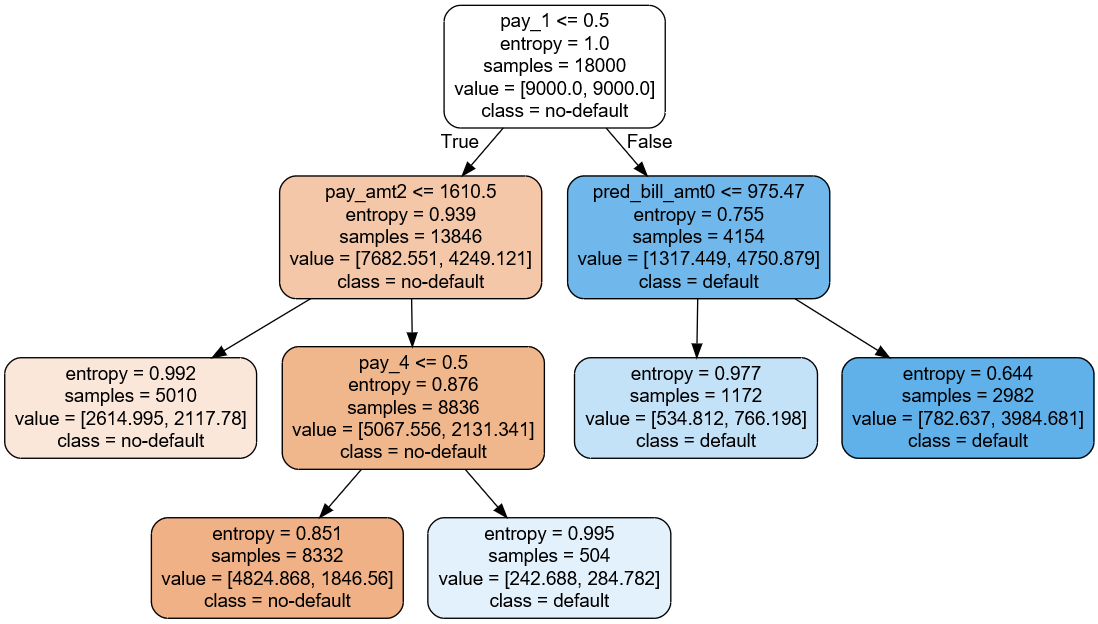

In [51]:
print(roc_auc_score(y_train, y_pred_train))
print(roc_auc_score(y_test, y_pred))

0.6930846391870852
0.6864302956698932


### Feature importances

In [52]:
feature_importance_tree = pd.DataFrame(list(zip(X_train.columns, tree_clf.feature_importances_)), 
                   columns=['Feature', 'Importance']).sort_values(by=['Importance'], ascending=False)

Hence, it appears that our most important variables seem to be:

In [53]:
list(feature_importance_tree.sort_values(by=['Importance'], ascending=False)['Feature'])[:9]

['pay_1',
 'pred_bill_amt0',
 'pay_amt2',
 'pay_4',
 'marriage_1',
 'education_3',
 'pay_2',
 'pay_3',
 'pay_5']

## Random Forest

In [54]:
from sklearn.ensemble import RandomForestClassifier

rnd_clf = RandomForestClassifier(n_estimators=500, 
                                 max_leaf_nodes=10, 
                                 n_jobs=-1, 
                                 class_weight='balanced',
                                random_state=42)
rnd_clf.fit(X_train, np.ravel(y_train))

RandomForestClassifier(bootstrap=True, class_weight='balanced',
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=10, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       n_estimators=500, n_jobs=-1, oob_score=False,
                       random_state=42, verbose=0, warm_start=False)

In [55]:
y_pred_train = rnd_clf.predict(X_train)

print('--TRAIN--')
print('accuracy: ', accuracy_score(y_train, y_pred_train))
print('recall: ', recall_score(y_train, y_pred_train))
print('F1: ', f1_score(y_train, y_pred_train))


y_pred = rnd_clf.predict(X_test)

print('--TEST--')
print('accuracy: ', accuracy_score(y_test, y_pred))
print('recall: ', recall_score(y_test, y_pred))
print('F1: ', f1_score(y_test, y_pred))

--TRAIN--
accuracy:  0.7608888888888888
recall:  0.6353591160220995
F1:  0.5403673643741991
--TEST--
accuracy:  0.7581666666666667
recall:  0.6141672946495855
F1:  0.5290490100616683


In [56]:
print(classification_report(y_train, 
                            y_pred_train, 
                            target_names=['non-default', 'default']))

              precision    recall  f1-score   support

 non-default       0.88      0.80      0.84     14018
     default       0.47      0.64      0.54      3982

    accuracy                           0.76     18000
   macro avg       0.68      0.72      0.69     18000
weighted avg       0.79      0.76      0.77     18000



In [57]:
print(classification_report(y_test, 
                            y_pred, 
                            target_names=['non-default', 'default']))

              precision    recall  f1-score   support

 non-default       0.88      0.80      0.84      4673
     default       0.46      0.61      0.53      1327

    accuracy                           0.76      6000
   macro avg       0.67      0.71      0.68      6000
weighted avg       0.79      0.76      0.77      6000



In [58]:
print(roc_auc_score(y_train, y_pred_train))
print(roc_auc_score(y_test, y_pred))

0.7159532061776926
0.7066128576821649


### Feature importances

In [59]:
rnd_clf.feature_importances_

array([4.41927838e-02, 2.95190886e-01, 1.64873830e-01, 1.05946884e-01,
       7.51477589e-02, 7.13559657e-02, 4.73644141e-02, 1.28282874e-02,
       9.72154308e-03, 6.94881237e-03, 6.52472670e-03, 5.33753836e-03,
       3.90694076e-03, 3.73269728e-02, 3.02318074e-02, 2.62259574e-02,
       1.35800295e-02, 1.13064879e-02, 1.42696702e-02, 1.36451465e-02,
       4.80049820e-05, 1.98988034e-04, 1.58766408e-03, 1.74824754e-04,
       2.87393129e-05, 7.33658255e-04, 1.24036474e-05, 3.74663882e-05,
       0.00000000e+00, 1.98253656e-05, 2.93014447e-05, 5.07252679e-05,
       0.00000000e+00, 2.49899622e-04, 0.00000000e+00, 2.02447334e-05,
       1.08180129e-05, 2.40019326e-05, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 7.28657601e-04, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 1.18333943e-04, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00])

In [60]:
coefs=np.array(rnd_clf.feature_importances_)
abs_coefs = np.abs(coefs)

In [61]:
feature_importances_rf = pd.DataFrame(list(zip(colonnes_dummies, coefs, abs_coefs)),
                                  columns=['Feature', 'Coef', 'Abs Coef'])

In [62]:
feature_importances_rf.sort_values(by=['Abs Coef'], ascending=False)

,Feature,Coef,Abs Coef
1,pay_1,0.295191,0.295191
2,pay_2,0.164874,0.164874
3,pay_3,0.105947,0.105947
4,pay_4,0.075148,0.075148
5,pay_5,0.071356,0.071356
6,pay_6,0.047364,0.047364
0,limit_bal,0.044193,0.044193
13,pay_amt1,0.037327,0.037327
14,pay_amt2,0.030232,0.030232
15,pay_amt3,0.026226,0.026226


# To plot later

Hence, it appears that our most important variables seem to be:

In [63]:
list(feature_importances_rf.sort_values(by=['Abs Coef'], ascending=False)['Feature'])[:9]

['pay_1',
 'pay_2',
 'pay_3',
 'pay_4',
 'pay_5',
 'pay_6',
 'limit_bal',
 'pay_amt1',
 'pay_amt2']

Our new predicted bill_amt0 seems to be more important than bill_amt1, and the previous ones, which is a good sign!

## Boostings models

### AdaBoost

In [64]:
from sklearn.ensemble import AdaBoostClassifier

ada_clf = AdaBoostClassifier()
ada_clf.fit(X_train_norm, np.ravel(y_train))

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0,
                   n_estimators=50, random_state=None)

In [65]:
y_pred_train = ada_clf.predict(X_train_norm)

print('--TEST--')
print('accuracy: ', accuracy_score(y_train, y_pred_train))
print('recall: ', recall_score(y_train, y_pred_train))
print('F1: ', f1_score(y_train, y_pred_train))


y_pred = ada_clf.predict(X_test_norm)

print('--TEST--')
print('accuracy: ', accuracy_score(y_test, y_pred))
print('recall: ', recall_score(y_test, y_pred))
print('F1: ', f1_score(y_test, y_pred))

--TEST--
accuracy:  0.8088333333333333
recall:  0.32169763937719736
F1:  0.42678660669665164
--TEST--
accuracy:  0.8055
recall:  0.306706857573474
F1:  0.41090358404846034


In [66]:
print(classification_report(y_train, 
                            y_pred_train, 
                            target_names=['non-default', 'default']))

              precision    recall  f1-score   support

 non-default       0.83      0.95      0.89     14018
     default       0.63      0.32      0.43      3982

    accuracy                           0.81     18000
   macro avg       0.73      0.63      0.66     18000
weighted avg       0.79      0.81      0.78     18000



In [67]:
print(classification_report(y_test, 
                            y_pred, 
                            target_names=['non-default', 'default']))

              precision    recall  f1-score   support

 non-default       0.83      0.95      0.88      4673
     default       0.62      0.31      0.41      1327

    accuracy                           0.81      6000
   macro avg       0.73      0.63      0.65      6000
weighted avg       0.78      0.81      0.78      6000



In [68]:
print(roc_auc_score(y_train, y_pred_train))
print(roc_auc_score(y_test, y_pred))

0.6344541842199155
0.6269250102119457


### XGBoost

In [413]:
a = classification_report(y_test, y_pred)

C:\Users\twang\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [415]:
type(a)

str

### LightGBM

#### From scratch

In [338]:
categorical_features = ['gender', 'education', 'marriage', 'pay_1', 'pay_2', 'pay_3', 'pay_4', 'pay_5', 'pay_6']

In [336]:
X_raw_train, X_raw_test, y_train, y_test = train_test_split(X_raw, y_raw, 
                                                           test_size=0.25, 
                                                           random_state=42)

In [420]:
d_train = lgb.Dataset(X_raw_train, 
                      label=y_train, 
                      categorical_feature=categorical_features,
                     free_raw_data=False)
d_test = lgb.Dataset(X_raw_test, 
                     y_test, 
                     reference=d_train, 
                     categorical_feature=categorical_features,
                    free_raw_data=True)

In [770]:
params = {
    'learning_rate': 0.06,
    'boosting_type': 'gbdt',
    'objective': 'binary',
    'metric': 'auc',
    
    
    'scale_pos_weight': 6,
    'num_leaves': 15,
    'max_depth': 7,
    'min_data_in_leaf': 500, # Min number of data needed in a child leaf,
    
    'bagging_freq': 1, # enabling random selection of data
    'bagging_fraction': 0.8,
    'feature_fraction': 0.8,
    'verbose': 1,
}

In [771]:
print('Starting training...')
lgbm = lgb.train(params,
                 d_train,
                 valid_sets=[d_train, d_test],
                 valid_names=['train', 'valid'],
                 num_boost_round=1000,
                 early_stopping_rounds=100,
                verbose_eval=50)

Starting training...
Training until validation scores don't improve for 100 rounds
[50]	train's auc: 0.796194	valid's auc: 0.773692
[100]	train's auc: 0.807604	valid's auc: 0.774857
[150]	train's auc: 0.817109	valid's auc: 0.773354
[200]	train's auc: 0.824683	valid's auc: 0.771904
Early stopping, best iteration is:
[103]	train's auc: 0.808167	valid's auc: 0.775002


In [772]:
print('Saving model...')
# save model to file
lgbm.save_model('model_lgbm.txt')

Saving model...


In [773]:
print('Starting predicting...')
# predict
y_pred = lgbm.predict(X_raw_test, num_iteration=lgbm.best_iteration)
# eval


Starting predicting...


In [774]:
y_pred = np.where(y_pred>0.5, 1, 0)

In [775]:
confusion_matrix(y_test, y_pred)

array([[3394, 2479],
       [ 331, 1296]], dtype=int64)

In [776]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.91      0.58      0.71      5873
           1       0.34      0.80      0.48      1627

    accuracy                           0.63      7500
   macro avg       0.63      0.69      0.59      7500
weighted avg       0.79      0.63      0.66      7500



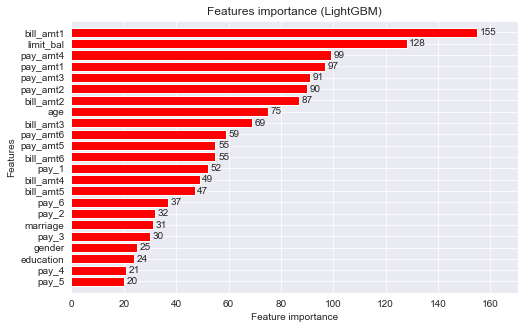

<Figure size 1296x504 with 0 Axes>

In [777]:
fig, (ax) = plt.subplots(ncols=1, figsize=(8,5))
plt.figure(figsize=(18,7))
lgb.plot_importance(lgbm, height=0.8, title="Features importance (LightGBM)", ax=ax,color="red") 
plt.show()

In [588]:
type(lgbm)

lightgbm.basic.Booster

### Random search to fine-tune our hyperparametres

https://www.kaggle.com/mlisovyi/lightgbm-hyperparameter-optimisation-lb-0-761

In [807]:
from scipy.stats import randint as sp_randint
from scipy.stats import uniform as sp_uniform
param_test ={'learning_rate': sp_uniform(loc=0.01, scale=0.19),
             'scale_pos_weight': sp_randint(100,150),
             'num_leaves': sp_randint(6, 50), 
             'min_child_samples': sp_randint(100, 500), 
             #'min_child_weight': [1e-5, 1e-3, 1e-2, 1e-1, 1, 1e1, 1e2, 1e3, 1e4],
             'subsample': sp_uniform(loc=0.2, scale=0.8), 
             'bagging_fraction': sp_uniform(loc=0.4, scale=0.6),
             'feature_fraction': sp_uniform(loc=0.4, scale=0.6),
             #'reg_alpha': [0, 1e-1, 1, 2, 5, 7, 10, 50, 100],
             #'reg_lambda': [0, 1e-1, 1, 5, 10, 20, 50, 100]
            }

In [826]:
nb_random = 10

from sklearn.model_selection import RandomizedSearchCV
clf = lgb.LGBMClassifier(max_depth=-1, 
                        boosting_type = 'gbdt',
                        objective= 'binary',
                        random_state=42)

In [845]:
random_search = RandomizedSearchCV(estimator=clf,
                                  param_distributions=param_test,
                                  n_iter=nb_random,
                                  scoring='balanced_accuracy',
                                  cv=3,
                                  refit=True,
                                  random_state=42,
                                  verbose=True)

In [846]:
categorical_features = ['gender', 'education', 'marriage', 'pay_1', 'pay_2', 'pay_3', 'pay_4', 'pay_5', 'pay_6']

fit_params={"early_stopping_rounds": 30, 
            "eval_metric" : 'balanced_accuracy', 
            "eval_set" : [(X_raw_test, np.ravel(y_test))],
            'eval_names': ['valid'],
            'verbose': 100,
            'categorical_feature': categorical_features}

In [847]:
import time

In [848]:
t0 = time.time()
random_search.fit(X_raw, np.ravel(y_raw), **fit_params)
t1 = time.time()
print('Random search with {} tries took: {:.2f}s'.format(nb_random, t1-t0))

Fitting 3 folds for each of 10 candidates, totalling 30 fits
Training until validation scores don't improve for 30 rounds


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
C:\Users\twang\AppData\Local\Continuum\anaconda3\lib\site-packages\lightgbm\basic.py:1247: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['education', 'gender', 'marriage', 'pay_1', 'pay_2', 'pay_3', 'pay_4', 'pay_5', 'pay_6']
  'New categorical_feature is {}'.format(sorted(list(categorical_feature))))


Early stopping, best iteration is:
[1]	valid's binary_logloss: 0.5593
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[1]	valid's binary_logloss: 0.559155
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[1]	valid's binary_logloss: 0.559181
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[1]	valid's binary_logloss: 0.530263
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[1]	valid's binary_logloss: 0.530482
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[1]	valid's binary_logloss: 0.530023
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[1]	valid's binary_logloss: 0.526354
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[1]	valid's binary_logloss: 0.526353

[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:    9.7s finished


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[1]	valid's binary_logloss: 0.559521
Random search with 10 tries took: 10.39s


In [849]:
opt_params = random_search.best_params_

In [850]:
random_search.best_score_

0.5

In [851]:
y_pred_random_search = random_search.predict(X_raw_test)

In [852]:
y_pred_random_search = np.where(y_pred_random_search>0.5, 1, 0)

In [853]:
print(classification_report(y_test, y_pred_random_search))

              precision    recall  f1-score   support

           0       0.78      1.00      0.88      5873
           1       0.00      0.00      0.00      1627

    accuracy                           0.78      7500
   macro avg       0.39      0.50      0.44      7500
weighted avg       0.61      0.78      0.69      7500



C:\Users\twang\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [605]:
clf = lgb.LGBMClassifier()

In [254]:
X_raw.head()

,limit_bal,gender,education,marriage,age,pay_1,pay_2,pay_3,pay_4,pay_5,pay_6,bill_amt1,bill_amt2,bill_amt3,bill_amt4,bill_amt5,bill_amt6,pay_amt1,pay_amt2,pay_amt3,pay_amt4,pay_amt5,pay_amt6
0,20000.0,2,2,1,24,1,1,0,0,0,0,3913.0,3102.0,689.0,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0
1,120000.0,2,2,2,26,0,1,0,0,0,1,2682.0,1725.0,2682.0,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0
2,90000.0,2,2,2,34,0,0,0,0,0,0,29239.0,14027.0,13559.0,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0
3,50000.0,2,2,1,37,0,0,0,0,0,0,46990.0,48233.0,49291.0,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0
4,50000.0,1,2,1,57,0,0,0,0,0,0,8617.0,5670.0,35835.0,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0


In [256]:
categorical_features = ['gender', 'education', 'marriage', 'pay_1', 'pay_2', 'pay_3', 'pay_4', 'pay_5', 'pay_6']

In [307]:
params_lgbm = {
          'boosting_type': 'gbdt',
          'objective': 'binary',
            'is_unbalanced':True,
          'metric':'auc',
          'learning_rate': 0.05,
          'num_leaves': 15,  # we should let it be smaller than 2^(max_depth)
          'max_depth': 7,  # -1 means no limit
          'min_child_samples': 100,  # Minimum number of data need in a child(min_data_in_leaf)
          'max_bin': 100,  # Number of bucketed bin for feature values
          'subsample': 0.9,  # Subsample ratio of the training instance.
          'subsample_freq': 1,  # frequence of subsample, <=0 means no enable
          'colsample_bytree': 0.7,  # Subsample ratio of columns when constructing each tree.
          'min_child_weight': 0,  # Minimum sum of instance weight(hessian) needed in a child(leaf)
          'min_split_gain': 0,  # lambda_l1, lambda_l2 and min_gain_to_split to regularization
          'nthread': 8,
          'verbose': 1,
          'scale_pos_weight':50, # because training data is sightly unbalanced 
         }

In [308]:
np.ravel(y_raw.values)

array([1, 1, 0, ..., 1, 1, 1], dtype=int64)

In [309]:
# on vérifie que les types des variable catégorielles sont bien des int, et non pas categorical
X_raw.dtypes

limit_bal    float64
gender         int64
education      int64
marriage       int64
age            int64
pay_1          int64
pay_2          int64
pay_3          int64
pay_4          int64
pay_5          int64
pay_6          int64
bill_amt1    float64
bill_amt2    float64
bill_amt3    float64
bill_amt4    float64
bill_amt5    float64
bill_amt6    float64
pay_amt1     float64
pay_amt2     float64
pay_amt3     float64
pay_amt4     float64
pay_amt5     float64
pay_amt6     float64
dtype: object

In [310]:
dtrain = lgb.Dataset(X_raw.values, 
                     label=np.ravel(y_raw.values),
                     feature_name=list(X_raw.columns),
                     categorical_feature=categorical_features,
                    free_raw_data=False)

In [311]:
evals_results={}
MAX_ROUNDS = 1000 #lgb iterations
EARLY_STOP = 50 #lgb early stop 
OPT_ROUNDS = 1000  #To be adjusted based on best validation rounds
VERBOSE_EVAL = 50 #Print out metric result

In [312]:
lgbm = lgb.train(params_lgbm, 
                  dtrain, 
                  evals_result=evals_results, 
                  num_boost_round=MAX_ROUNDS,
                  verbose_eval=VERBOSE_EVAL, 
                  feval=None)

C:\Users\twang\AppData\Local\Continuum\anaconda3\lib\site-packages\lightgbm\basic.py:1243: UserWarning: Using categorical_feature in Dataset.
  warnings.warn('Using categorical_feature in Dataset.')


In [313]:
y_raw.describe()

,default
count,30000.000000
mean,0.221200
std,0.415062
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1.000000


In [322]:
y_pred = lgbm.predict(X_raw)

In [323]:
y_pred

array([0.98565234, 0.97167218, 0.82523721, ..., 0.95817876, 0.93619706,
       0.87557382])

In [324]:
y_pred = np.where(y_pred>0.5, 1, 0)

In [328]:
confusion_matrix(y_raw, y_pred)

array([[ 5215, 18149],
       [    0,  6636]], dtype=int64)

In [326]:
print(classification_report(y_raw, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.22      0.36     23364
           1       0.27      1.00      0.42      6636

    accuracy                           0.40     30000
   macro avg       0.63      0.61      0.39     30000
weighted avg       0.84      0.40      0.38     30000



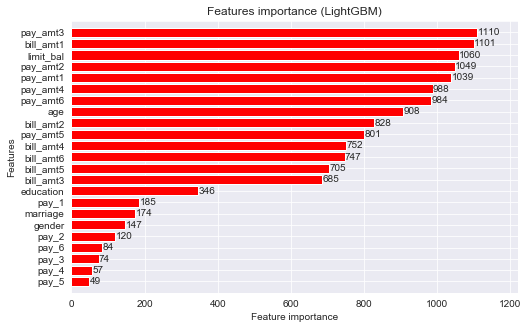

In [327]:
fig, (ax) = plt.subplots(ncols=1, figsize=(8,5))
lgb.plot_importance(lgbm, height=0.8, title="Features importance (LightGBM)", ax=ax,color="red") 
plt.show()

In [287]:
lgbm.predict(X_raw)

array([0.98617058, 0.97296606, 0.86569794, ..., 0.98072076, 0.90652921,
       0.90622171])

In [ ]:
X_train.head()

In [ ]:
categorical_features = ['SEX', 'EDUCATION', 'MARRIAGE','PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']


### CatBoost

# Pipeline Testing

In [73]:
from sklearn.preprocessing import FunctionTransformer
bin_age_transformer = FunctionTransformer(bin_age, validate=True)


In [77]:
X, y = load_data_xy(path)

In [86]:
X.head()

,limit_bal,gender,education,marriage,age,pay_1,pay_2,pay_3,pay_4,pay_5,pay_6,bill_amt1,bill_amt2,bill_amt3,bill_amt4,bill_amt5,bill_amt6,pay_amt1,pay_amt2,pay_amt3,pay_amt4,pay_amt5,pay_amt6
0,20000.0,2,2,1,24,1,1,0,0,0,0,3913.0,3102.0,689.0,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0
1,120000.0,2,2,2,26,0,1,0,0,0,1,2682.0,1725.0,2682.0,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0
2,90000.0,2,2,2,34,0,0,0,0,0,0,29239.0,14027.0,13559.0,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0
3,50000.0,2,2,1,37,0,0,0,0,0,0,46990.0,48233.0,49291.0,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0
4,50000.0,1,2,1,57,0,0,0,0,0,0,8617.0,5670.0,35835.0,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0


In [88]:
from dataprep.pipelines import AgeBinAdder
AgeBinAdder().transform(X)

ModuleNotFoundError: No module named 'feature_eng'

Pourquoi le module n'est pas trouvable?

TO DO:
create a pipeline for different processings of the dataset: 1 is categorical, while the other one is 1-hot encoded

# Relève la tête du guidon gros!
## Quel est le Big Picture du problème?

Notre objectif = prédire quelles sont les personnes les plus susceptibles de défault  
ie trouver celles pour qui y=1

## Quelles métriques sont possibles?

* Classification accuracy: no beacuase of our imbalanced classes to predict
* Logarithmic loss: 
* Area Under ROC Curve: 

## Quelles métriques pour cet objectif?

* recall = parmi les (y=1), quelle proportion a bien été détectée?

In [1]:
import sys
print(sys.executable)

C:\Users\twang\AppData\Local\Continuum\anaconda3\python.exe


In [5]:
import xgboost as xgb

In [6]:
import lightgbm as lgb